## Custom QC for motion energy

In [16]:
"""
Check sessions available with dlc data
@author: Ines
"""
import pandas as pd
import pickle 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from one.api import ONE
from uuid import UUID
import json
from scipy.stats import zscore

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from video_functions import get_ME, find_nearest
from one_functions_generic import timeseries_PSTH, prepro

one = ONE(mode='remote')

### Get QC of all sessions

In [22]:
data_path =  '/home/ines/repositories/representation_learning_variability/DATA/Brainwidemap/'
# data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/Brainwidemap/'

os.chdir(data_path)
qc = pd.read_csv("Brainwidemap_QC - behavior_data.csv")
video_type = 'left'

# Save extended and custom qc

In [67]:
def extended_left_dlc(one, qc):
    
    eids = qc['Session ID']

    # Initialize df
    df = pd.DataFrame()

    for e, eid in enumerate(eids):
        
        extended_qc = one.get_details(eid, True)['extended_qc']
        transposed_df = pd.DataFrame.from_dict(extended_qc, orient='index').T
        transposed_df['eid'] = eid
        df = df.append(transposed_df)
    
    return df

In [27]:
# Save extended and custom qc
# Save extended qc per session


# # Calculate licks per trial and append to extended qc df
# def custom_qc(df):
#     df_lick = df.loc[df['_dlcLeft_lick_detection']==True].reset_index()
#     sess_lick = df_lick['eid'].unique()
#     df_lick['ratio'] = df_lick['_dlcLeft_time_trace_length_match'] * np.nan
#     df_lick['licks_trial'] = df_lick['_dlcLeft_time_trace_length_match'] * np.nan

#     for e, eid in enumerate(sess_lick):
#         try:
#             lick_times = get_lick_times(one, eid, video_type = 'left')
#             trials = one.load_object(eid, obj='trials', namespace='ibl')
#             trials_df = trials.to_df()
#             # licks_psth = lick_psth(trials_df, lick_times, 1, 2, event='feedback_times')
#             licks_psth_post = lick_psth(trials_df, lick_times, 0, 1, event='feedback_times')

#             # Save
#             df_lick['ratio'][e] = round(len(lick_times) / len(trials_df), 2)
#             df_lick['licks_trial'][e] = licks_psth_post
            
#         except:
#             print('No licks for session '+str(eid))
    
#     return df_lick


In [68]:
ext_qc = extended_left_dlc(one, qc)

/tmp/ipykernel_25630/541224780.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transposed_df)
/tmp/ipykernel_25630/541224780.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transposed_df)
/tmp/ipykernel_25630/541224780.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transposed_df)
/tmp/ipykernel_25630/541224780.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transposed_df)
/tmp/ipykernel_25630/541224780.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

In [81]:
save_path = '/home/ines/repositories/representation_learning_variability/Video and wheel/Video QC'
os.chdir(save_path)
pickle.dump(ext_qc, open("dlc_left_extended_qc", "wb"))

In [61]:
interest = ['dlcLeft', 
       'videoLeft', '_videoLeft_focus', 
       '_videoLeft_position', '_videoLeft_framerate', '_videoLeft_pin_state', 
       '_videoLeft_brightness', '_videoLeft_resolution',
       '_videoLeft_timestamps', '_dlcLeft_if_mean_in_box', '_dlcLeft_lick_detection',
       '_videoLeft_camera_times', '_videoLeft_file_headers','_videoLeft_dropped_frames',
        '_videoLeft_wheel_alignment']

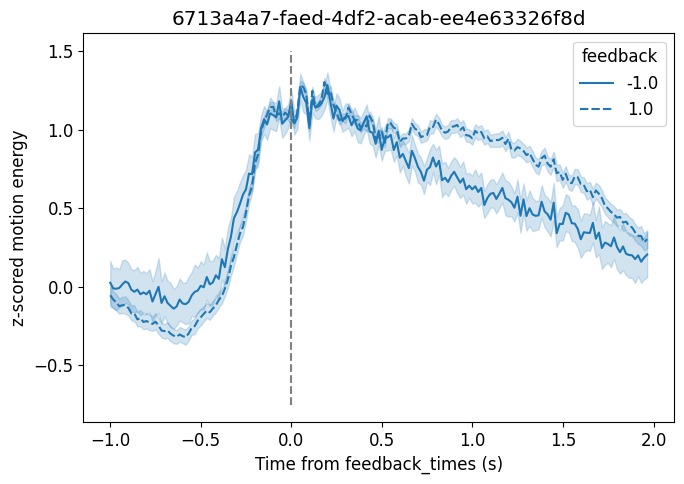

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps False
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection PASS
_videoLeft_camera_times [True, -41842]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


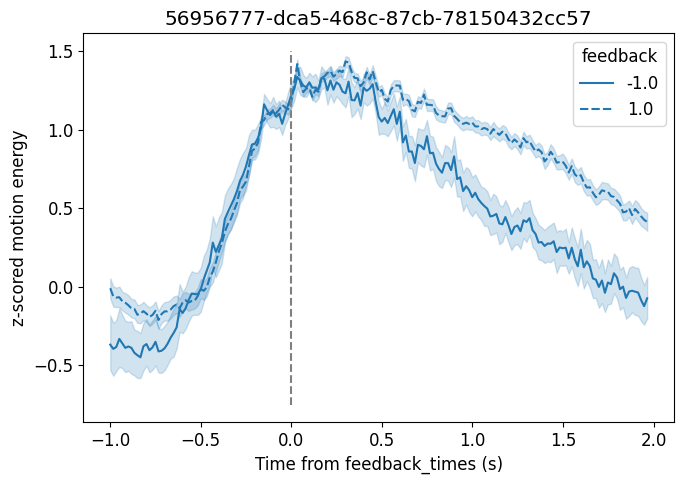

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


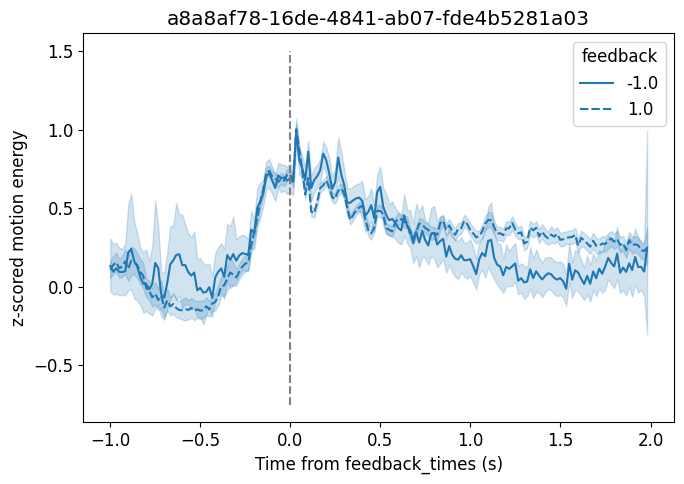

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


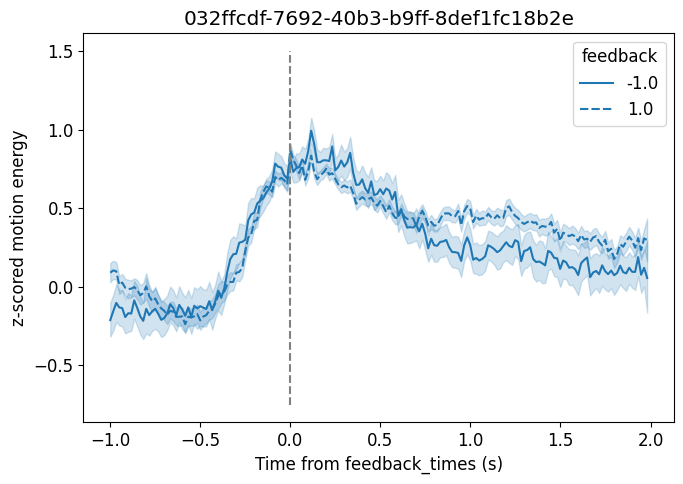

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


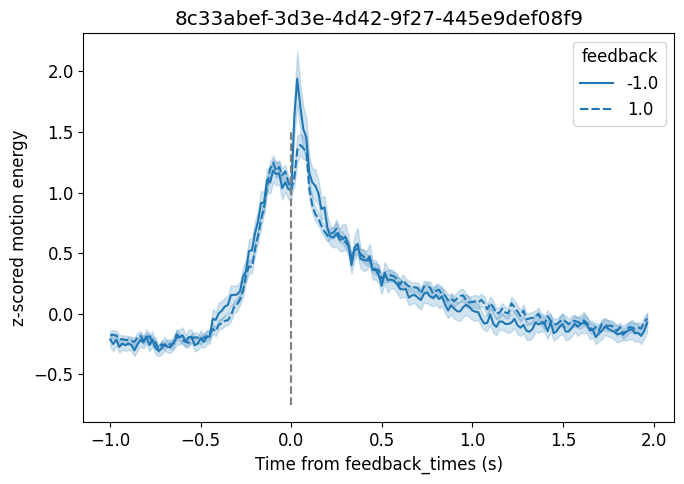

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position False
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


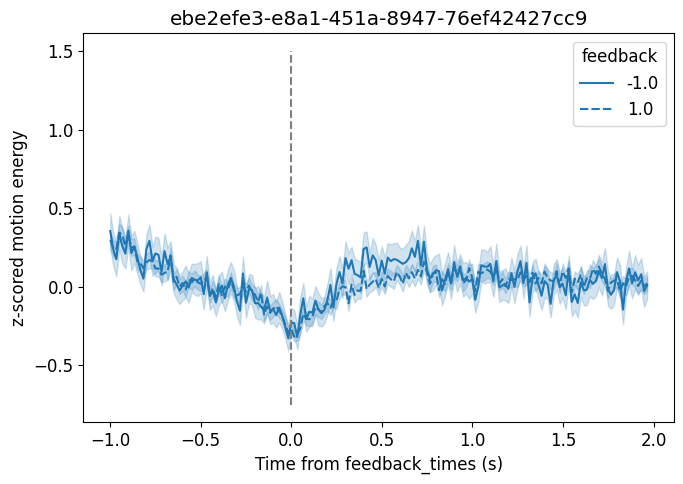

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position False
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state [True, 6, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box False
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 1]
_videoLeft_wheel_alignment [True, 0]


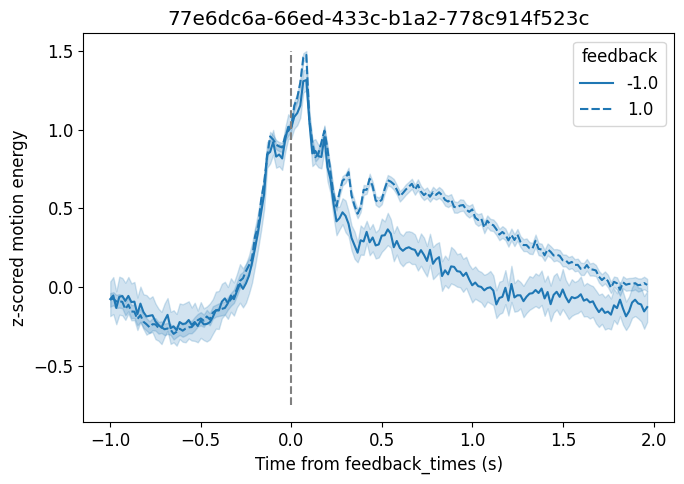

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position False
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state [True, 1, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 1]


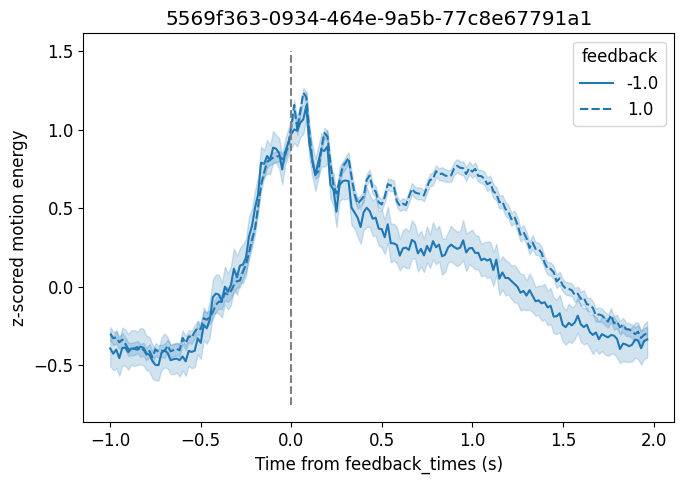

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus False
_videoLeft_position True
_videoLeft_framerate [True, 60.212]
_videoLeft_pin_state [True, 1, 1]
_videoLeft_brightness False
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 0]
_videoLeft_wheel_alignment [True, -8]


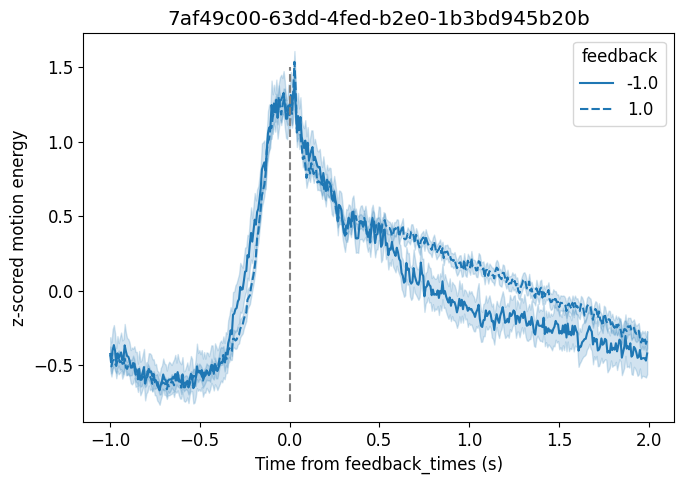

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [False, 149.269]
_videoLeft_pin_state [True, 80, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 4, 1]
_videoLeft_wheel_alignment [True, -1]


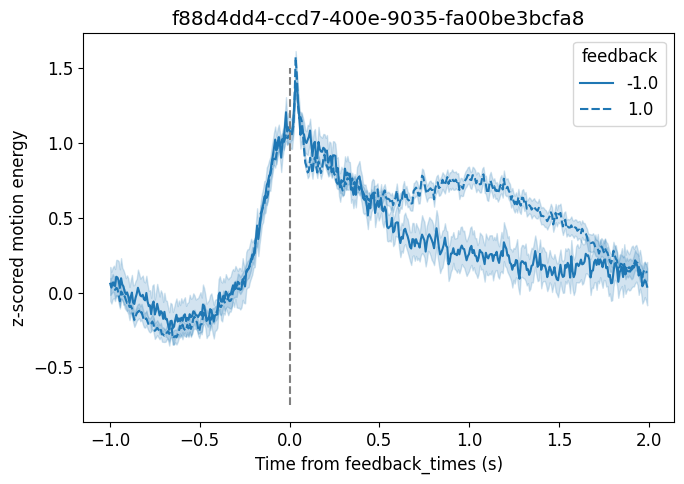

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [False, 149.269]
_videoLeft_pin_state [True, 1, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 8, 1]
_videoLeft_wheel_alignment [True, 1]


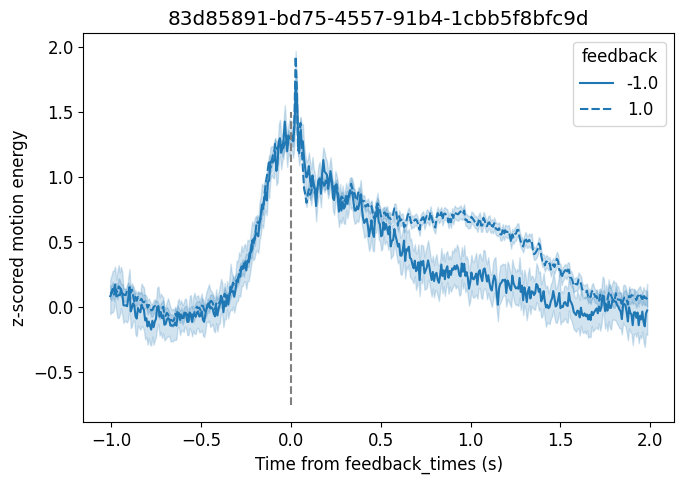

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [False, 149.269]
_videoLeft_pin_state [True, 3, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 10, 1]
_videoLeft_wheel_alignment [True, 1]


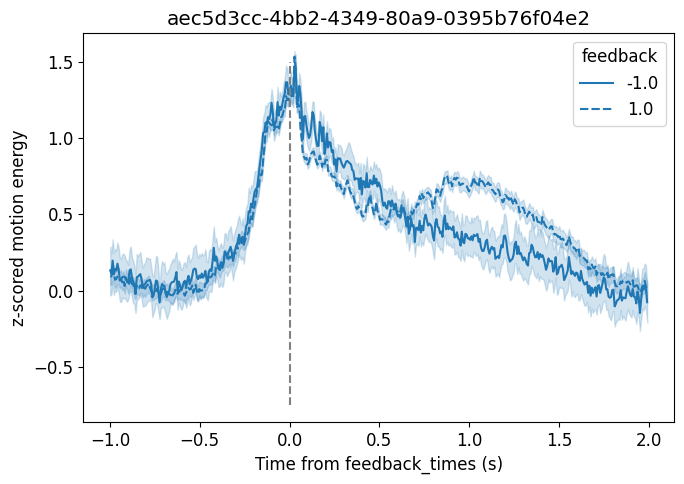

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [False, 149.269]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 11, 1]
_videoLeft_wheel_alignment [True, -1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-37/2021-02-01/001/alf/leftCamera.ROIMotionEnergy.f8df9e47-7cca-42a4-af82-6eb72dec161b.npy Bytes: 5174112


100%|██████████| 4.934417724609375/4.934417724609375 [00:01<00:00,  3.09it/s]


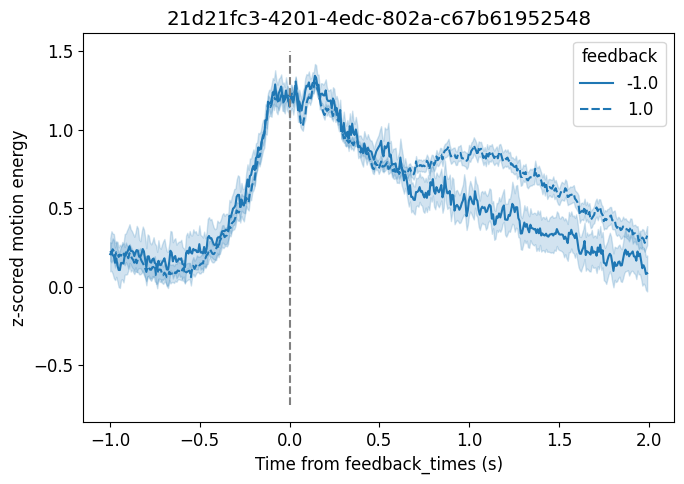

dlcLeft FAIL
videoLeft FAIL
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [False, 149.269]
_videoLeft_pin_state [True, 1, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 11, 0]
_videoLeft_wheel_alignment [True, 1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-39/2021-05-10/001/alf/leftCamera.ROIMotionEnergy.f08ae76e-9b36-48b4-baff-e1d6506affac.npy Bytes: 1743280


100%|██████████| 1.6625213623046875/1.6625213623046875 [00:01<00:00,  1.54it/s]


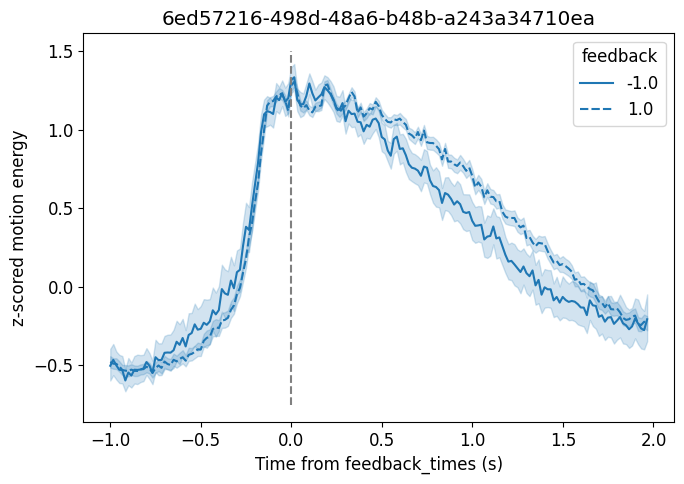

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 3, 1]
_videoLeft_wheel_alignment [True, 0]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-39/2021-05-11/001/alf/leftCamera.ROIMotionEnergy.95e82392-acc7-4649-b807-1dd7b1d80376.npy Bytes: 1774040


100%|██████████| 1.6918563842773438/1.6918563842773438 [00:01<00:00,  1.55it/s]


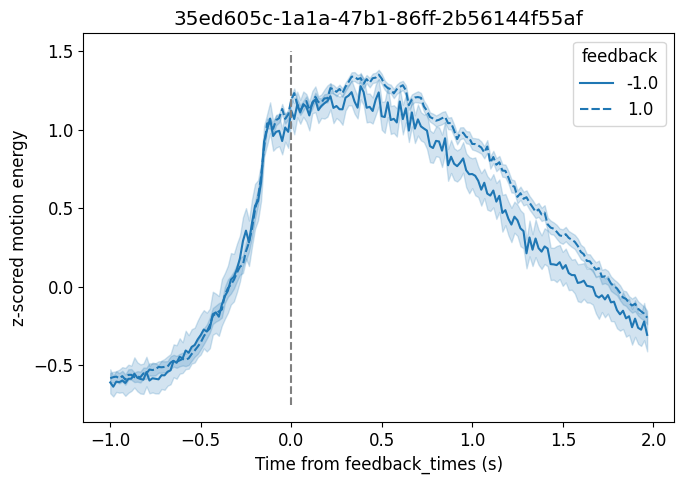

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 2, 1]
_videoLeft_wheel_alignment [True, 1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-39/2021-05-12/001/alf/leftCamera.ROIMotionEnergy.b654468b-e56a-4165-a438-894002b33e6e.npy Bytes: 1826528


100%|██████████| 1.741912841796875/1.741912841796875 [00:01<00:00,  1.39it/s]


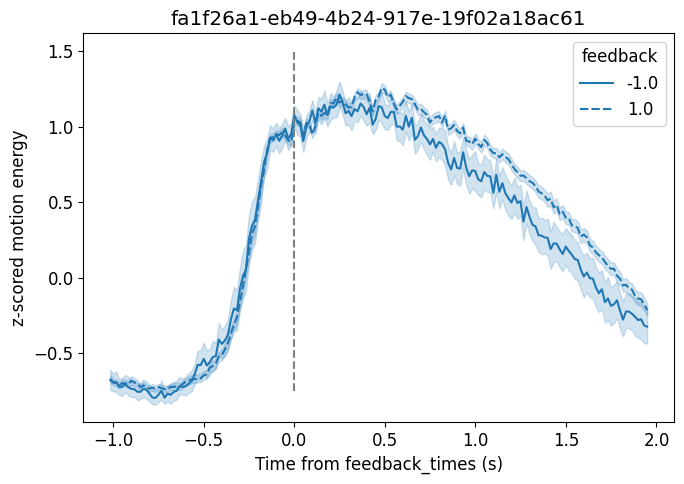

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 2]


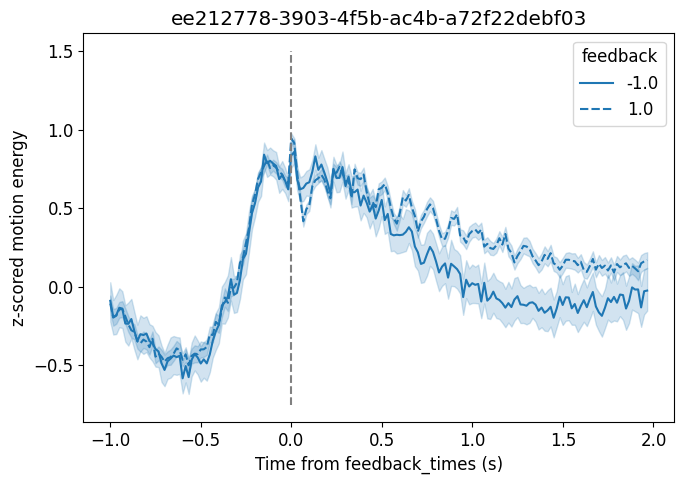

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus False
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 6, 1]
_videoLeft_brightness False
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 1]
_videoLeft_wheel_alignment [True, 0]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-39/2021-05-14/001/alf/leftCamera.ROIMotionEnergy.c54f2da9-cad4-4e47-88c7-b604380c0f40.npy Bytes: 1963984


100%|██████████| 1.8730010986328125/1.8730010986328125 [00:01<00:00,  1.39it/s]


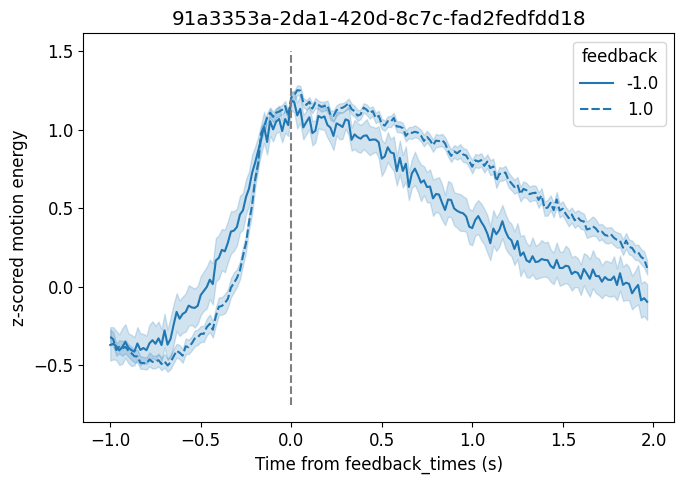

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 1]
_videoLeft_wheel_alignment [True, -1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-40/2021-04-13/001/alf/leftCamera.ROIMotionEnergy.0a6bedaf-a2a0-4944-8b2c-406b7fb02b00.npy Bytes: 1808184


100%|██████████| 1.7244186401367188/1.7244186401367188 [00:01<00:00,  1.36it/s]


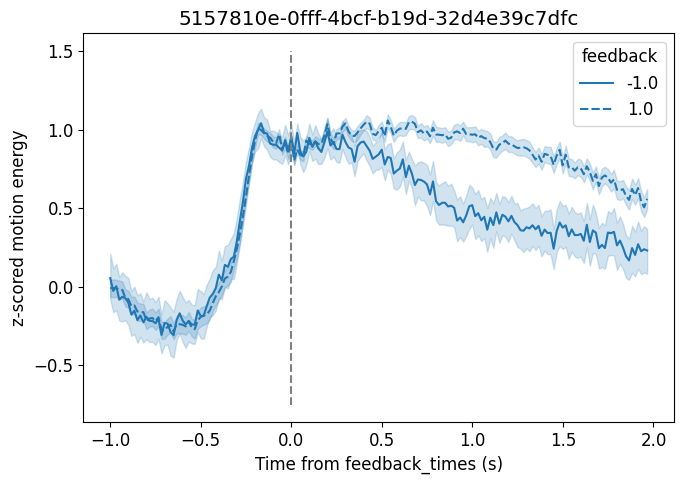

dlcLeft WARNING
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-40/2021-04-14/001/alf/leftCamera.ROIMotionEnergy.cabcb3fa-6abe-4aca-a643-cb8db311bd6f.npy Bytes: 1944048


100%|██████████| 1.8539886474609375/1.8539886474609375 [00:01<00:00,  1.02it/s]


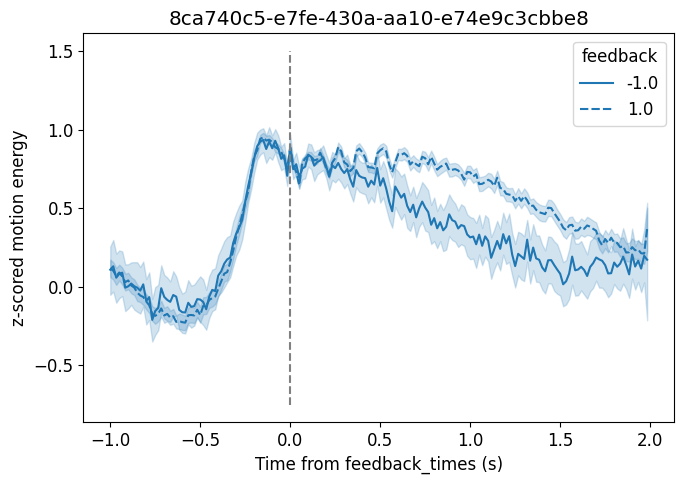

dlcLeft WARNING
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]


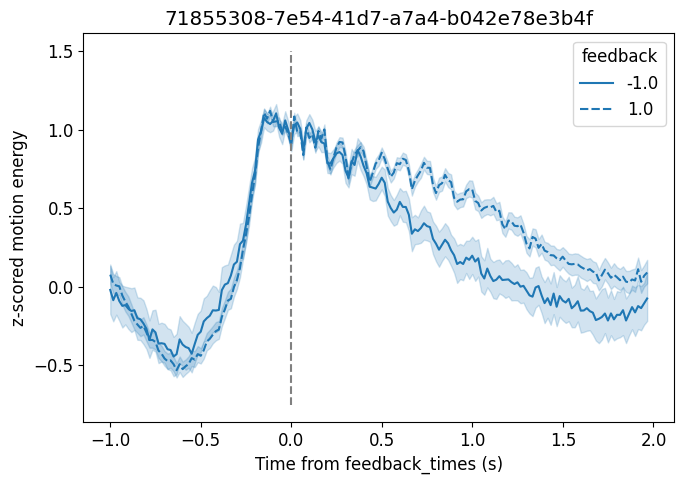

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 1]


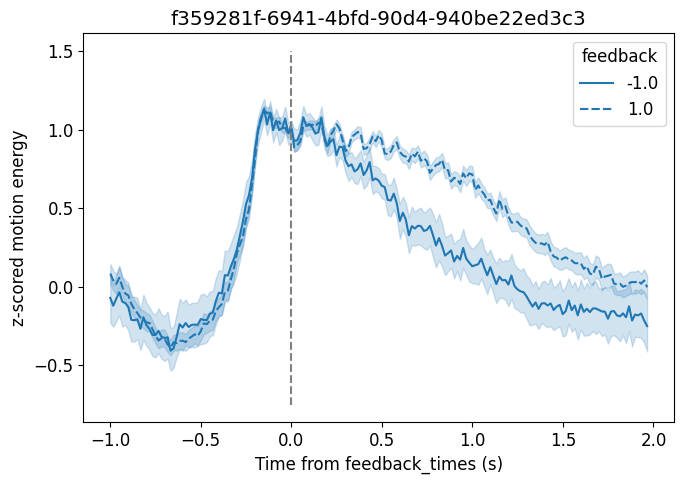

dlcLeft PASS
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]


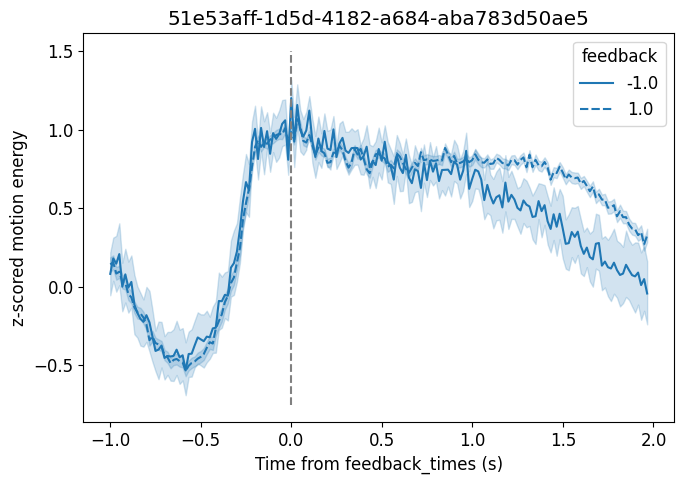

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 1]
_videoLeft_wheel_alignment [True, 0]


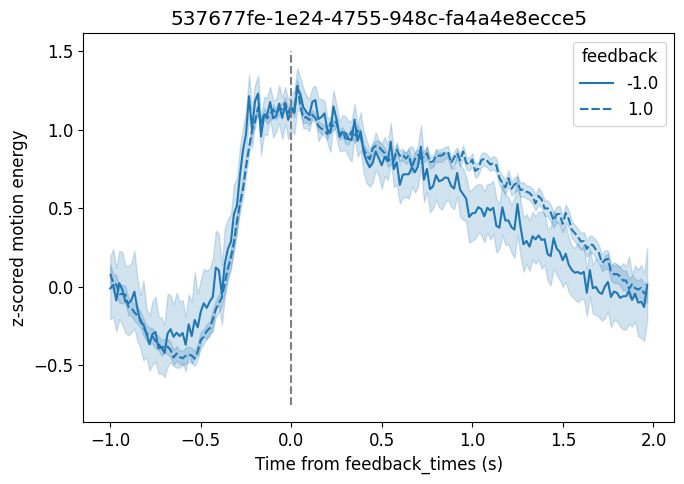

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]


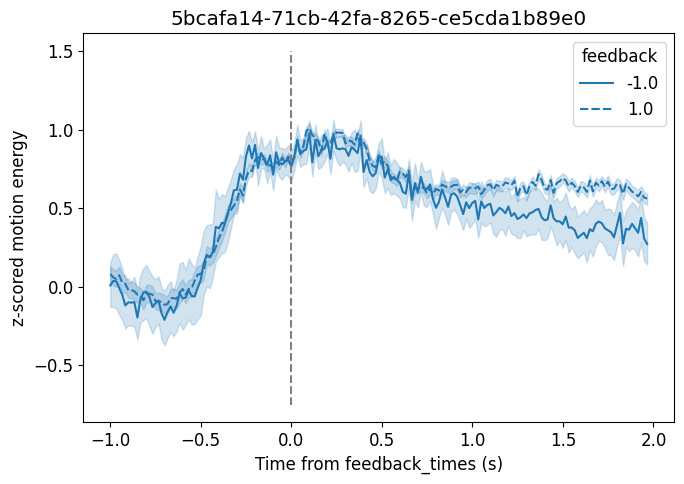

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 0]
_videoLeft_wheel_alignment [True, 1]


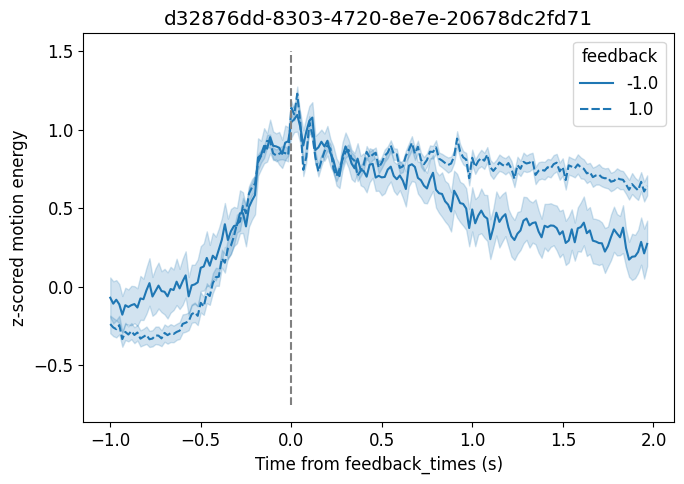

dlcLeft PASS
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]


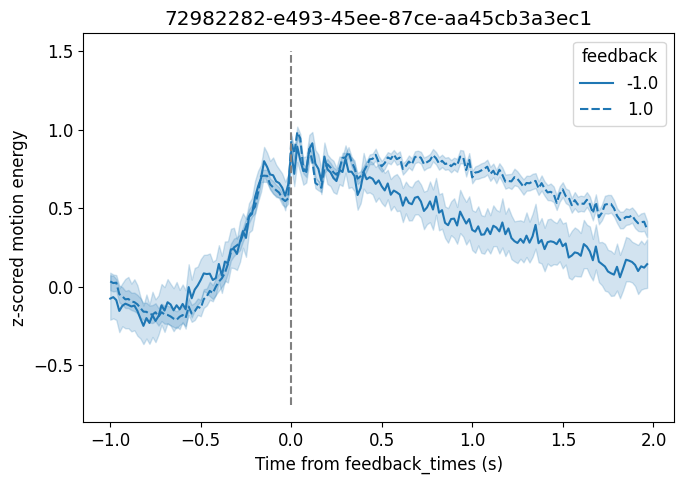

dlcLeft PASS
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 0]
_videoLeft_wheel_alignment [True, 0]


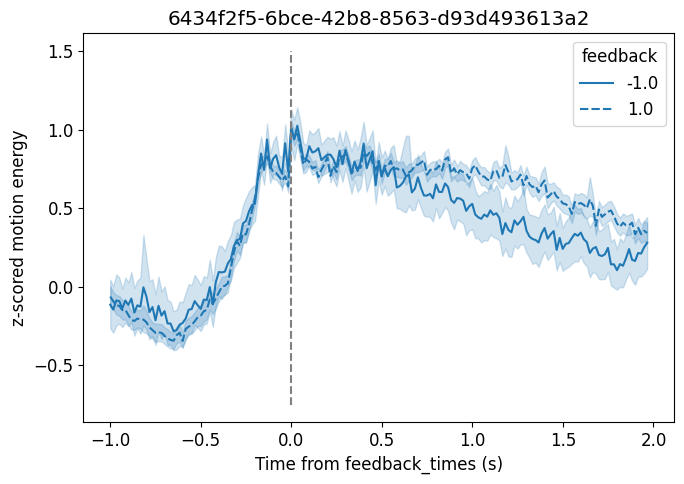

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 1]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 2, 1]
_videoLeft_wheel_alignment [True, 0]


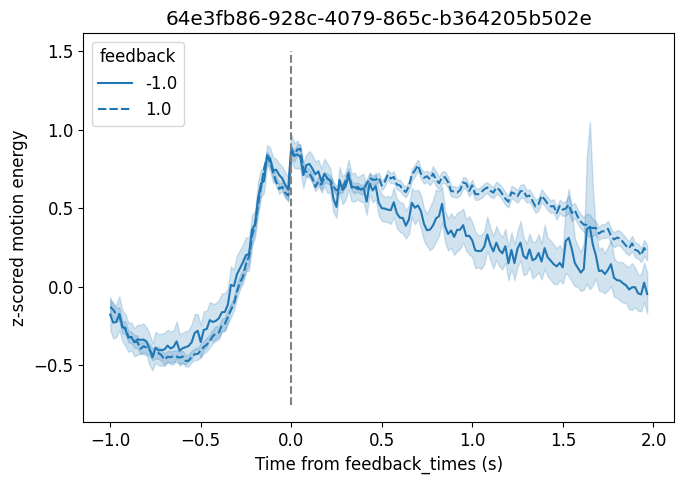

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 0]
_videoLeft_wheel_alignment [True, 0]


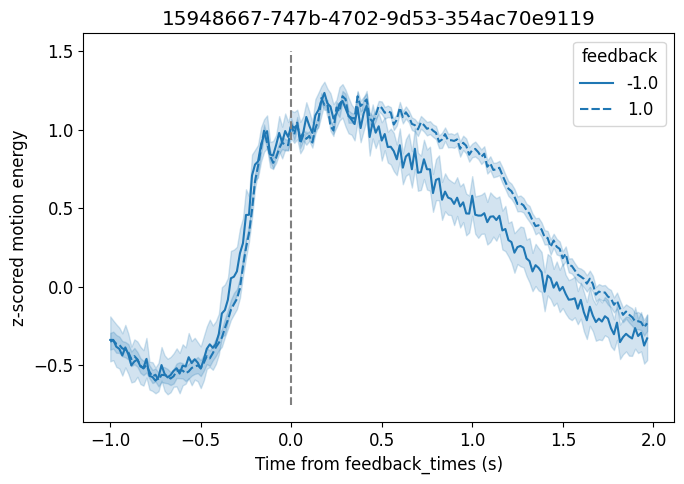

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 1]
_videoLeft_wheel_alignment [True, 0]


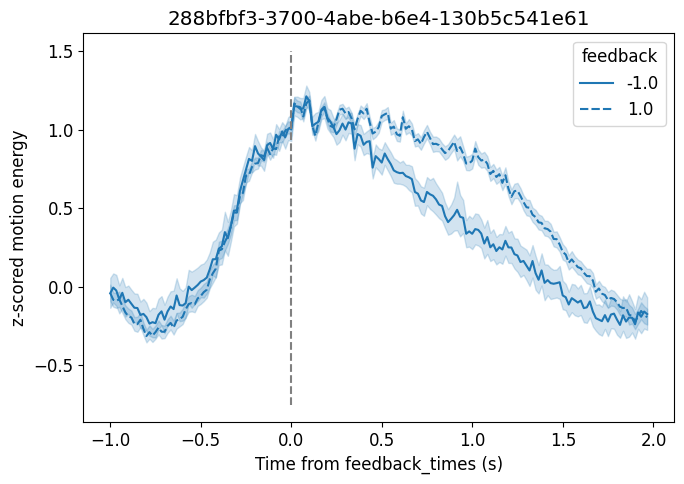

dlcLeft PASS
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 1]


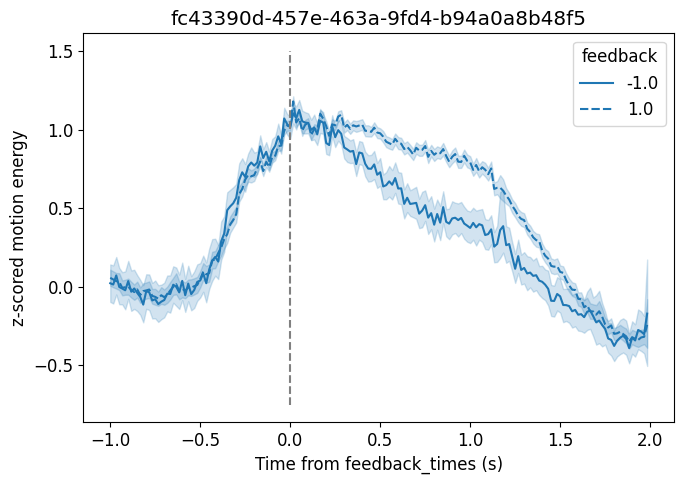

dlcLeft PASS
videoLeft PASS
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-48/2021-06-29/001/alf/leftCamera.ROIMotionEnergy.ea9fcecc-ddce-4e57-88fa-2c53f24edcb9.npy Bytes: 2076616


100%|██████████| 1.9804153442382812/1.9804153442382812 [00:01<00:00,  1.58it/s]


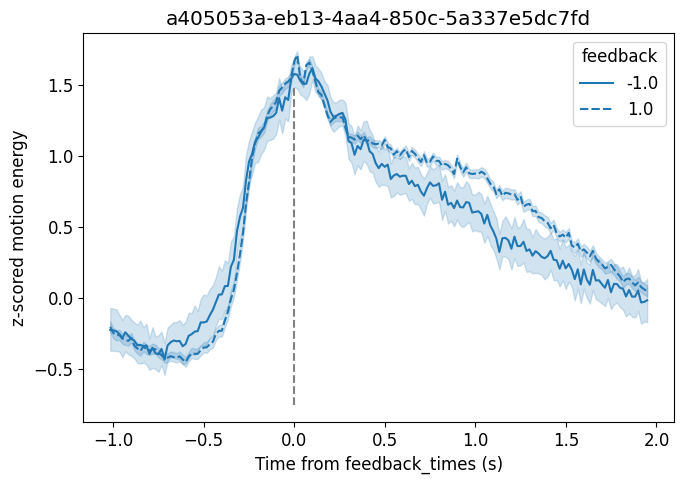

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 0, 1]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 1]
_videoLeft_wheel_alignment [True, -1]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-48/2021-07-01/001/alf/leftCamera.ROIMotionEnergy.e5e18210-3607-43c1-9d26-768c3ce03b85.npy Bytes: 1974696


100%|██████████| 1.8832168579101562/1.8832168579101562 [00:01<00:00,  1.67it/s]


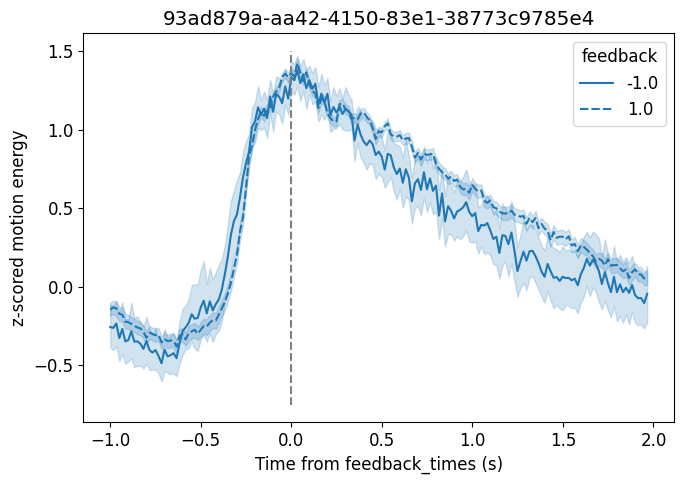

dlcLeft WARNING
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 1, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 1, 0]
_videoLeft_wheel_alignment [True, 0]


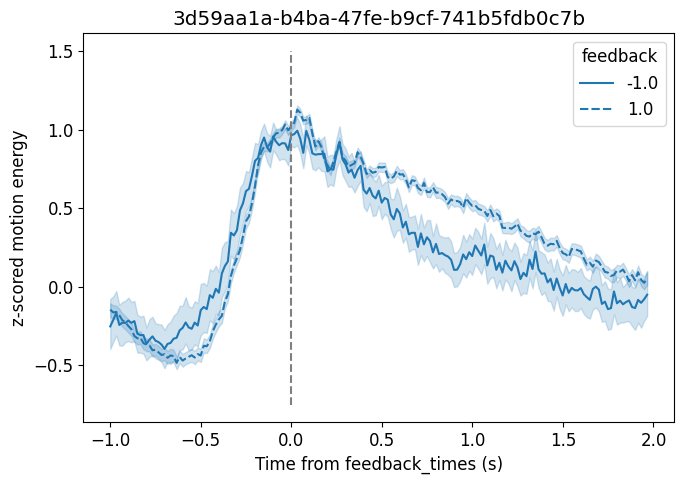

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.006]
_videoLeft_pin_state [True, 3, 0]
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box nan
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames [True, 0, 0]
_videoLeft_wheel_alignment [True, 0]
Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL045/2020-02-24/001/alf/leftCamera.ROIMotionEnergy.043ce93c-57d4-4019-868e-fc235f01ee40.npy Bytes: 1860600


100%|██████████| 1.7744064331054688/1.7744064331054688 [00:01<00:00,  1.60it/s]


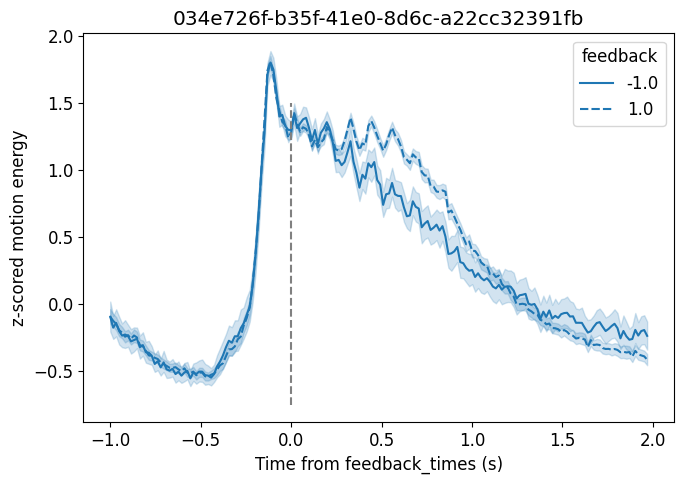

dlcLeft FAIL
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.976]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


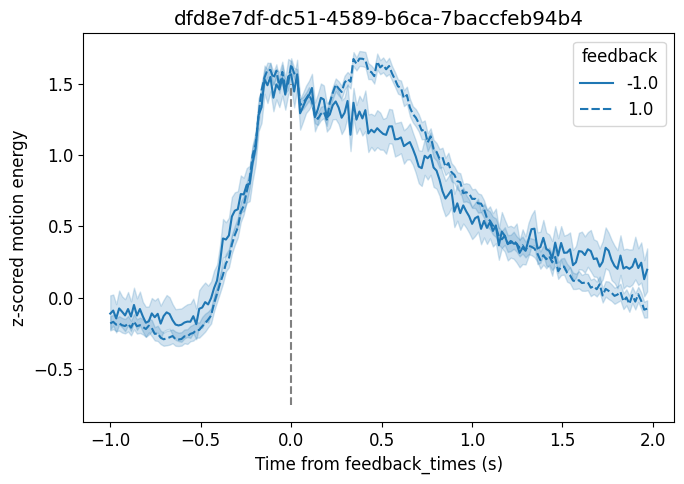

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.976]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


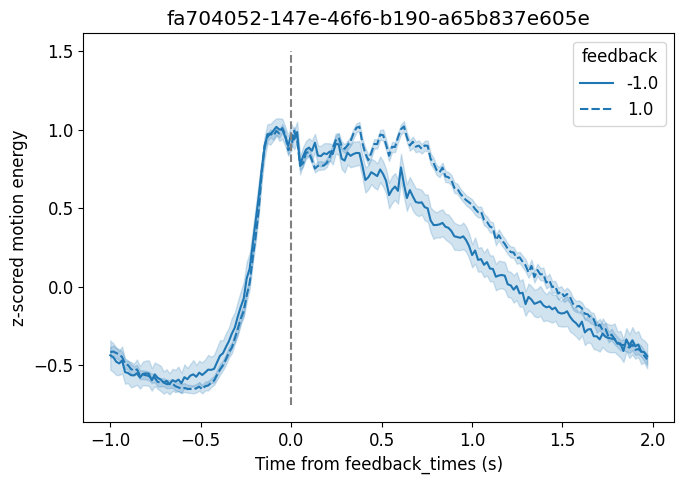

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.976]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


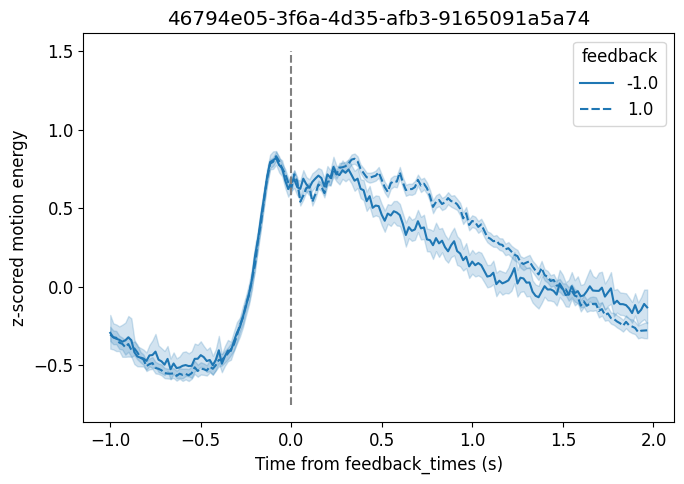

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.0]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


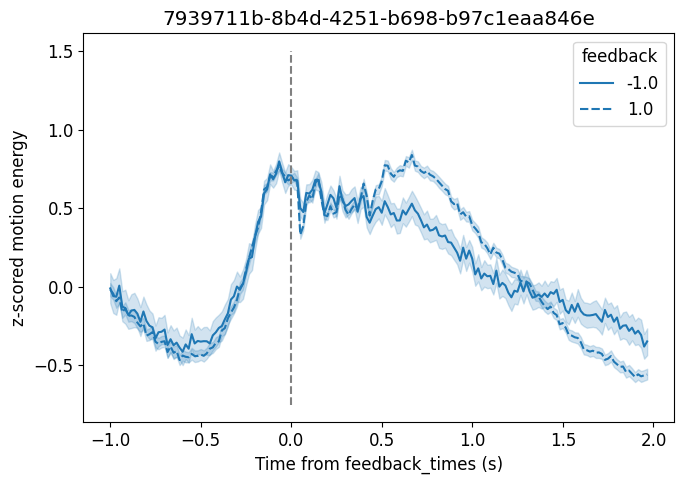

dlcLeft PASS
videoLeft FAIL
_videoLeft_focus False
_videoLeft_position True
_videoLeft_framerate [True, 60.0]
_videoLeft_pin_state PASS
_videoLeft_brightness False
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


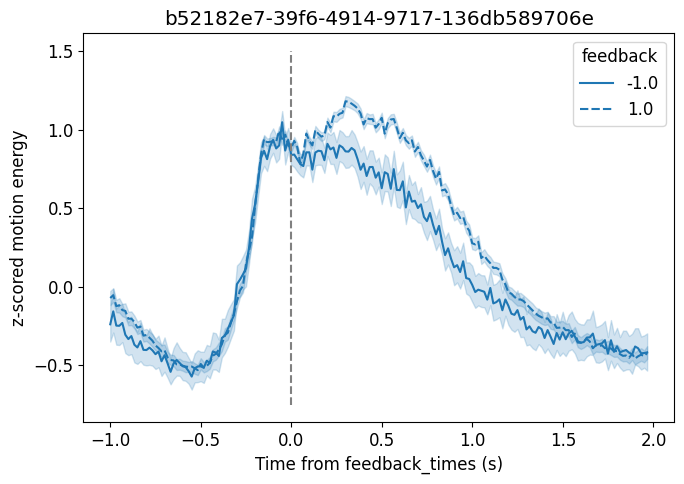

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.0]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


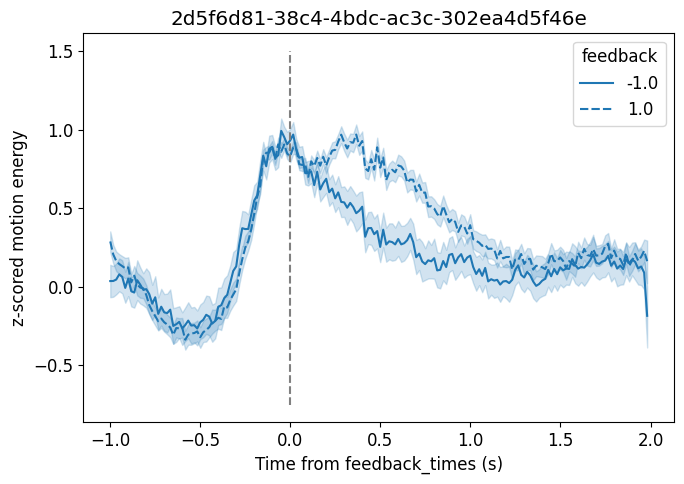

dlcLeft PASS
videoLeft WARNING
_videoLeft_focus True
_videoLeft_position True
_videoLeft_framerate [True, 60.12]
_videoLeft_pin_state PASS
_videoLeft_brightness True
_videoLeft_resolution True
_videoLeft_timestamps True
_dlcLeft_if_mean_in_box True
_dlcLeft_lick_detection True
_videoLeft_camera_times [True, 0]
_videoLeft_file_headers True
_videoLeft_dropped_frames None
_videoLeft_wheel_alignment PASS


ALFObjectNotFound: Dataset "alf/leftCamera.ROIMotionEnergy.npy" not found 
 The ALF object was not found.  This may occur if the object or namespace or incorrectly formatted e.g. the object "_ibl_trials.intervals.npy" would be found with the filters `object="trials", namespace="ibl"` 

In [79]:
eids = qc['Session ID'].unique()
for e, session in enumerate(eids):
        
        me_times, motion_energy = get_ME(one, session, video_type)       
        m = zscore(motion_energy,nan_policy='omit') 
        
        t_init = 1
        t_end = 2
        event = 'stimOn_times'
        event = 'feedback_times'
        # save_path = '/home/ines/repositories/representation_learning_variability/Exported figures/'

        session_trials = one.load_object(session, obj='trials', namespace='ibl')
        session_trials = session_trials.to_df() 
        
        # Align data for PSTH
        ME_left = timeseries_PSTH(me_times, m, session_trials, event, t_init, t_end, subtract_baseline=False)
        
        # Plot and save

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[7, 5])
        plt.rc('font', size=12)

        this_data = ME_left.reset_index()
        this_data['smooth_value'] = this_data['value'].rolling(3, min_periods=1).mean()
        this_data = this_data.loc[this_data['choice'].isin([1., -1.])]
        sns.lineplot(x='variable', y='smooth_value', style='feedback', data=this_data, ax = ax)
        #plt.hlines(0, -0.5, 1, color='gray', linestyles='--')
        plt.vlines(0, -.75, 1.5, color='gray', linestyles='--')
        ax.set_xlabel(' ')
        ax.set_xlabel('Time from ' + event + ' (s)')
        ax.set_ylabel('z-scored motion energy')
        ax.set_ylabel('z-scored motion energy')
        ax.set_title(session)

        plt.tight_layout()

        # Save the plot as a PNG file
        #     plt.savefig(str(save_path + session + '.png'), format='png')

        # Display the plot
        plt.show()
        
        for v in interest:
                var_interest = list(ext_qc.loc[ext_qc['eid']==session, v])[0]
                print(str(v + ' ' +str(var_interest)))
        

In [16]:
eids = qc['Session ID'].unique()
for e, session in enumerate(eids):
        
        me_times, motion_energy = get_ME(one, session, video_type)       
        m = zscore(motion_energy,nan_policy='omit') 
        
        t_init = 0.5
        t_end = 1
        event = 'stimOn_times'
        event = 'feedback_times'
        # save_path = '/home/ines/repositories/representation_learning_variability/Exported figures/'

        session_trials = one.load_object(session, obj='trials', namespace='ibl')
        session_trials = session_trials.to_df() 
        
        # Get only session relevant part
        ts = session_trials.intervals_0[0]
        te = list(session_trials.intervals_1)[-1]
        sta, end = find_nearest(me_times,ts), find_nearest(me_times,te) 
        t = me_times[sta:end]
        m = m[sta:end]

        # Align data for PSTH
        ME_left = timeseries_PSTH(m, t, session_trials, event, t_init, t_end, subtract_baseline=False)
        ME_left['camera'] = 'left'
        
        
        # Plot and save
        cameras = ['left', 'right']

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[7, 5])

        plt.rc('font', size=12)

        this_data = ME_left.reset_index()
        this_data['smooth_value'] = this_data['value'].rolling(3, min_periods=1).mean()
        this_data = this_data.loc[this_data['choice'].isin([1., -1.])]
        sns.lineplot(x='variable', y='smooth_value', style='feedback', data=this_data, ax = ax)
        #plt.hlines(0, -0.5, 1, color='gray', linestyles='--')
        plt.vlines(0, -.75, 1.5, color='gray', linestyles='--')
        ax.set_xlabel(' ')
        ax.set_xlabel('Time from ' + event + ' (s)')
        ax.set_ylabel('z-scored motion energy')
        ax.set_ylabel('z-scored motion energy')
        ax.set_title(session)

        plt.tight_layout()

        # Save the plot as a PNG file
        #     plt.savefig(str(save_path + session + '.png'), format='png')

        # Display the plot
        plt.show()
        
        # motion_energy = zscore(motion_energy, nan_policy='omit') 

Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-11/2020-02-18/001/alf/leftCamera.ROIMotionEnergy.c5d422e6-5388-4080-a183-7b4dfd06d815.npy Bytes: 2459128


100%|██████████| 2.3452072143554688/2.3452072143554688 [00:01<00:00,  1.30it/s]


NameError: name 't' is not defined

In [ ]:
# Save extended qc per session 
def extended_left_dlc(one, qc):
    
    eids = qc['Session ID']

    # Initialize df
    df = pd.DataFrame(columns=['eid', 'extended_qc', 'dlcLeft', 'videoLeft', '_dlcLeft_mean_in_bbox',
                            '_dlcLeft_lick_detection', '_dlcLeft_trace_all_nan',
                            '_dlcLeft_time_trace_length_match'], index=range(len(eids)))

    for e, eid in enumerate(eids):
        
        df['eid'][e] = eid
        extended_qc = one.get_details(eid, True)['extended_qc']
        df['extended_qc'][e] = extended_qc
        if 'dlcLeft' in extended_qc.keys():
            df['dlcLeft'][e] = extended_qc['dlcLeft']
        if 'videoLeft' in extended_qc.keys():
            df['videoLeft'][e] = extended_qc['videoLeft']
        if '_dlcLeft_mean_in_bbox' in extended_qc.keys():
            df['_dlcLeft_mean_in_bbox'][e] = extended_qc['_dlcLeft_mean_in_bbox']
        if '_dlcLeft_lick_detection' in extended_qc.keys():    
            df['_dlcLeft_lick_detection'][e] = extended_qc['_dlcLeft_lick_detection']
        if '_dlcLeft_trace_all_nan' in extended_qc.keys():
            df['_dlcLeft_trace_all_nan'][e] = extended_qc['_dlcLeft_trace_all_nan']
        if '_dlcLeft_time_trace_length_match' in extended_qc.keys():
            df['_dlcLeft_time_trace_length_match'][e] = extended_qc['_dlcLeft_time_trace_length_match']
            
    return df

# Calculate licks per trial and append to extended qc df
def custom_qc(df):
    df_lick = df.loc[df['_dlcLeft_lick_detection']==True].reset_index()
    sess_lick = df_lick['eid'].unique()
    df_lick['ratio'] = df_lick['_dlcLeft_time_trace_length_match'] * np.nan
    df_lick['licks_trial'] = df_lick['_dlcLeft_time_trace_length_match'] * np.nan

    for e, eid in enumerate(sess_lick):
        try:
            lick_times = get_lick_times(one, eid, video_type = 'left')
            trials = one.load_object(eid, obj='trials', namespace='ibl')
            trials_df = trials.to_df()
            # licks_psth = lick_psth(trials_df, lick_times, 1, 2, event='feedback_times')
            licks_psth_post = lick_psth(trials_df, lick_times, 0, 1, event='feedback_times')

            # Save
            df_lick['ratio'][e] = round(len(lick_times) / len(trials_df), 2)
            df_lick['licks_trial'][e] = licks_psth_post
            
        except:
            print('No licks for session '+str(eid))
    
    return df_lick
